In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

from prophet.plot import add_changepoints_to_plot

df = pd.read_csv('../data/instagram_natgeo.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

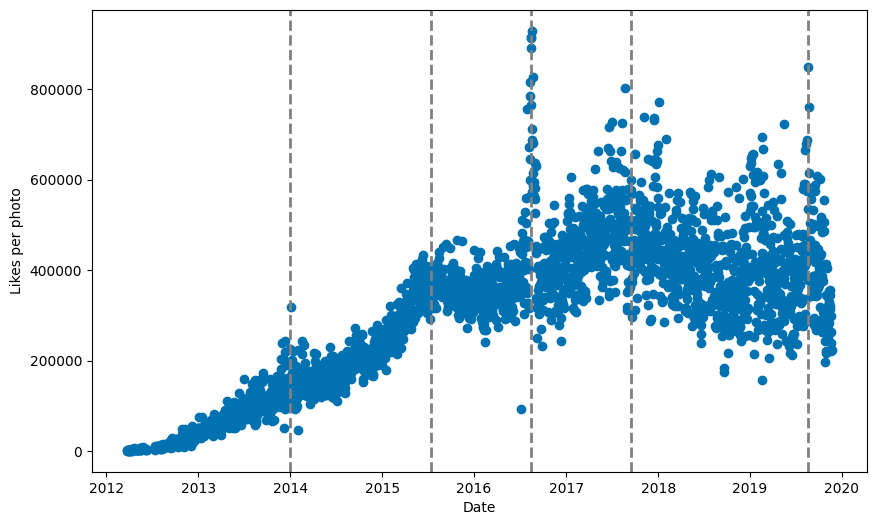

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.axvline(pd.to_datetime('2014-01-01'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2015-07-15'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2016-08-15'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2017-09-15'), c='gray', ls='--', lw=2)
plt.axvline(pd.to_datetime('2019-08-20'), c='gray', ls='--', lw=2)
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

07:41:59 - cmdstanpy - INFO - Chain [1] start processing
07:41:59 - cmdstanpy - INFO - Chain [1] done processing


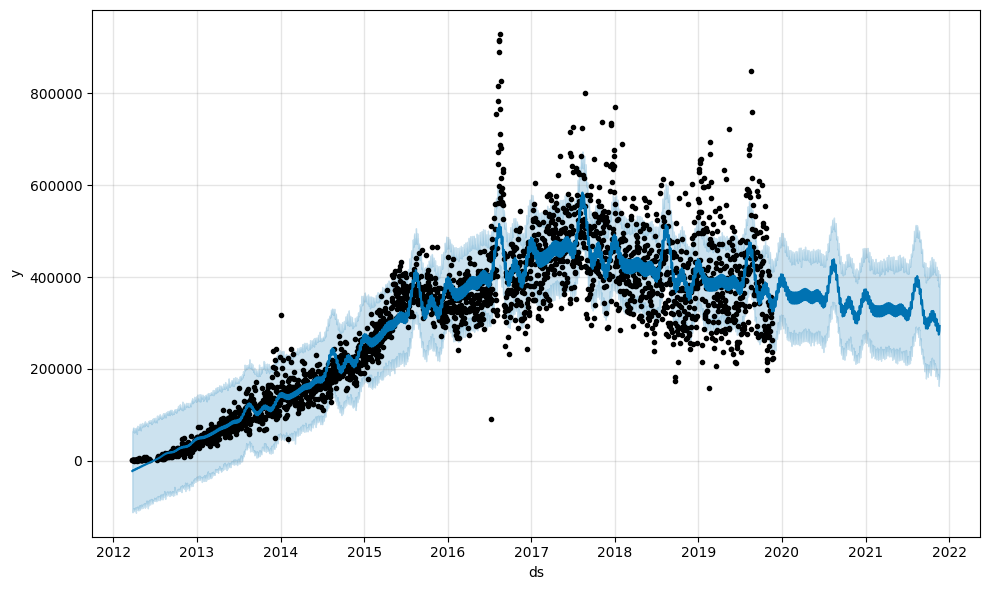

In [4]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

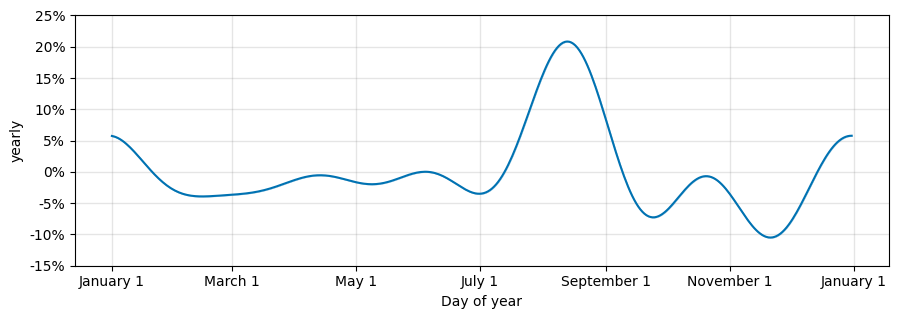

In [5]:
from prophet.plot import plot_yearly

plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

In [6]:
df2 = df[(df['ds'] < '2016-07-29') | (df['ds'] > '2016-09-01')]

07:48:51 - cmdstanpy - INFO - Chain [1] start processing
07:48:51 - cmdstanpy - INFO - Chain [1] done processing


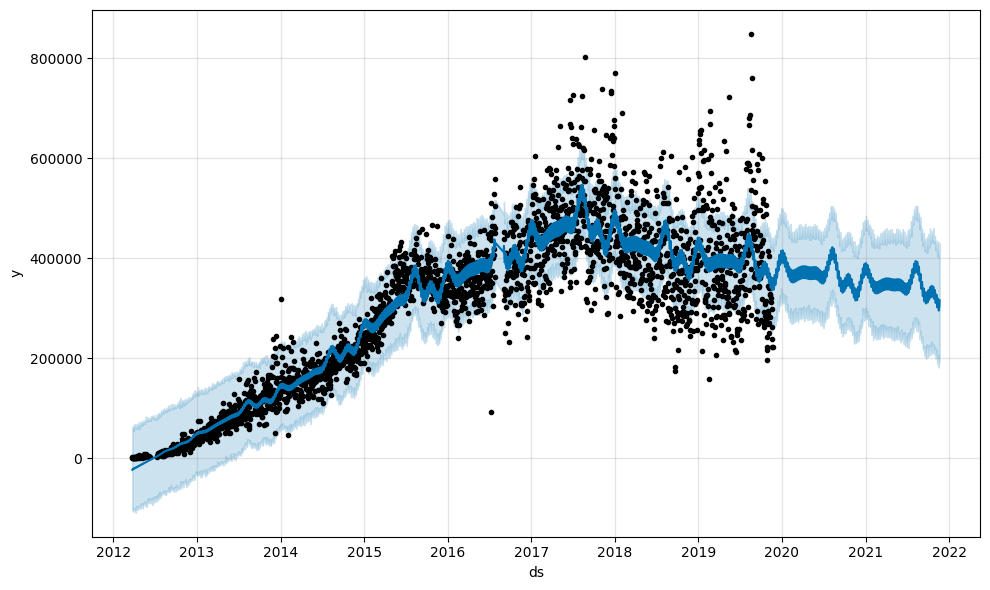

In [8]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df2)
future = model.make_future_dataframe(periods=365*2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

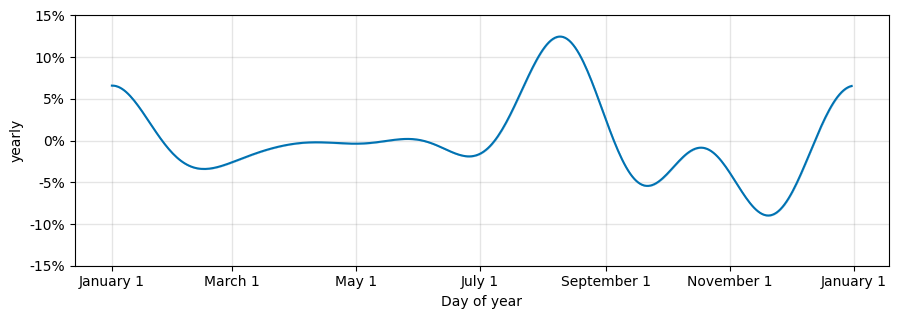

In [9]:
plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

In [10]:
df3 = df.copy()
df3.loc[df3['ds'].dt.year == 2016, 'y'] = 100000

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabel_format'

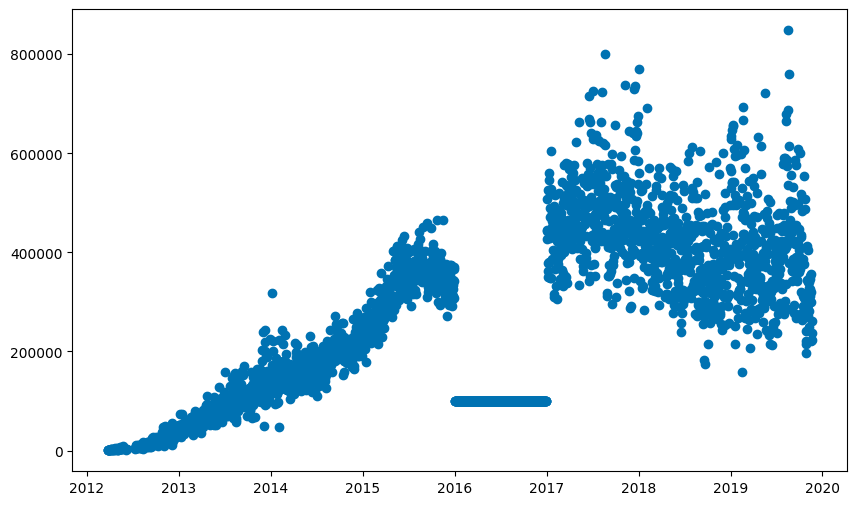

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df3['ds'], y=df3['y'], c='#0072B2')
plt.xticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

07:56:55 - cmdstanpy - INFO - Chain [1] start processing
07:56:55 - cmdstanpy - INFO - Chain [1] done processing


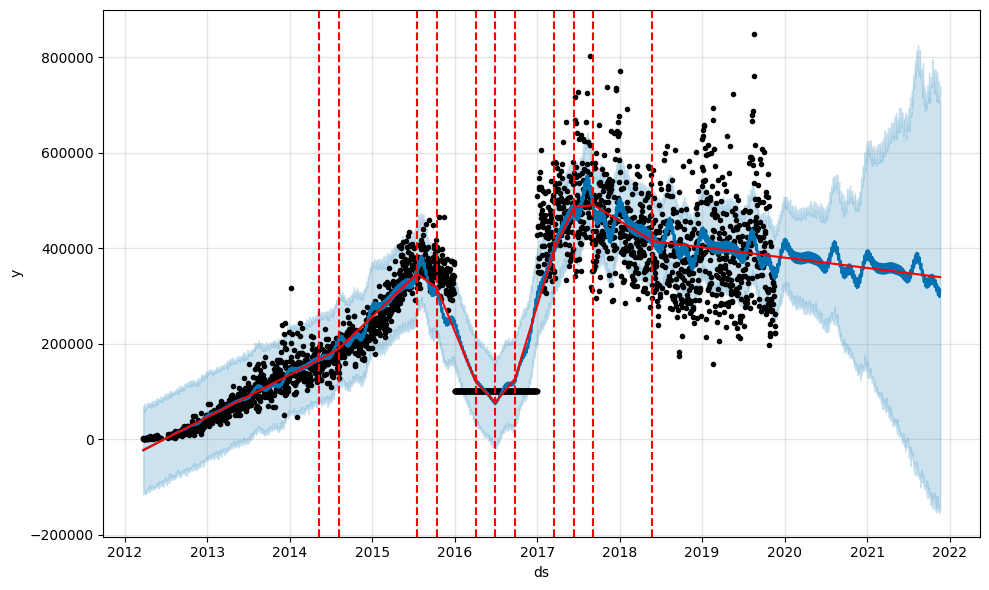

In [12]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df3)
future = model.make_future_dataframe(periods=365*2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [13]:
df3.loc[df3['ds'].dt.year == 2016, 'y'] = None

08:05:48 - cmdstanpy - INFO - Chain [1] start processing
08:05:48 - cmdstanpy - INFO - Chain [1] done processing


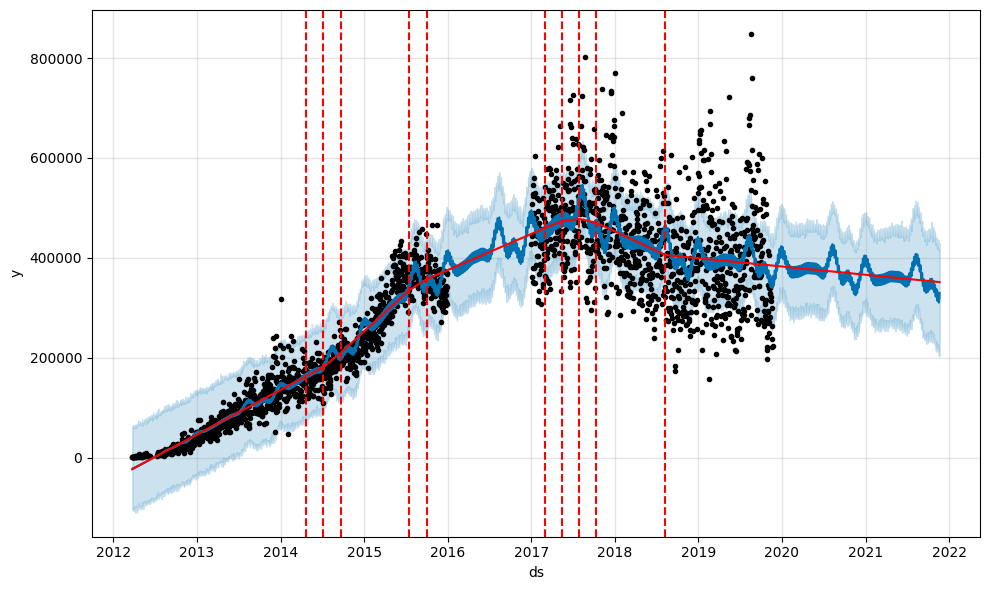

In [14]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6)
model.fit(df3)
future = model.make_future_dataframe(periods=365*2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

In [15]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 15.0 MB/s eta 0:00:00a 0:00:01


In [21]:
from scipy import stats
import numpy as np

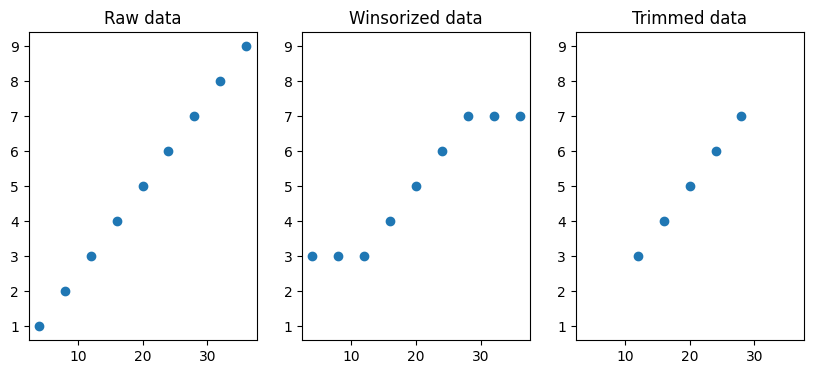

In [22]:
from matplotlib.ticker import MaxNLocator

x = [4 * val for val in [1, 2, 3, 4, 5, 6, 7, 8, 9]]
y = [.25 * val for val in x]

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x, y)
ax1.title.set_text('Raw data')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x, stats.mstats.winsorize(np.array(y), .25))
ax2.title.set_text('Winsorized data')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x[2:-2], y[2:-2])
ax3.title.set_text('Trimmed data')
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

plt.show()

In [23]:
df4 = df.copy().dropna()
df4['y'] = stats.mstats.winsorize(df4['y'], limits=(0, .05), axis=0)

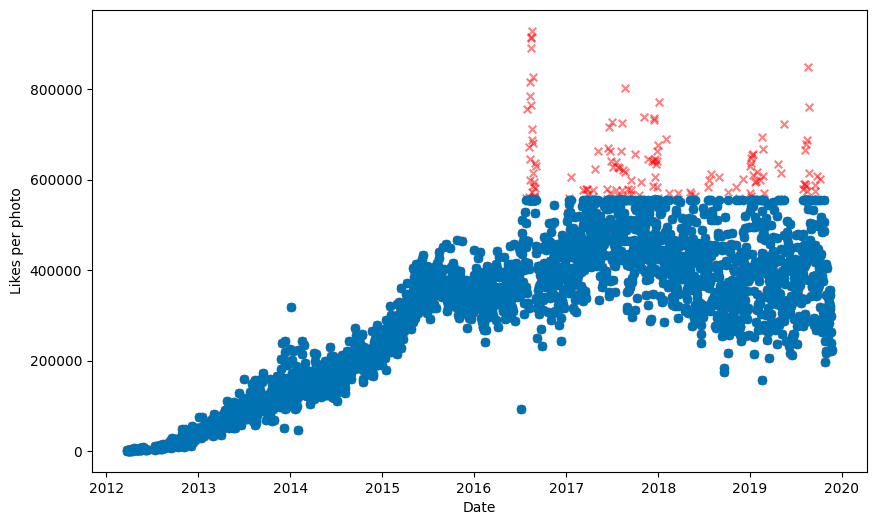

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df4['ds'], y=df4['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

In [26]:
df5 = df.copy().dropna()
df5 = df5[(stats.zscore(df5['y']) < 1.65)]

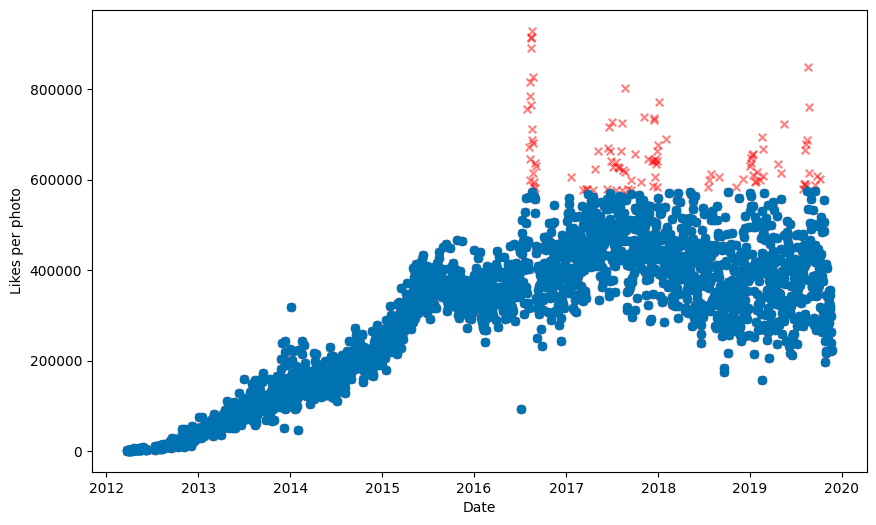

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df5['ds'], y=df5['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

In [48]:
df6 = df.copy().dropna()

df6['moving_average'] = df6.rolling(window=300,
                                    min_periods=1,
                                    center=True,
                                    on='ds')['y'].mean()
df6['std_dev'] = df6.rolling(window=300,
                             min_periods=1,
                             center=True,
                             on='ds')['y'].std()
df6['lower'] = df6['moving_average'] - 1.65 * df6['std_dev']
df6['upper'] = df6['moving_average'] + 1.65 * df6['std_dev']

df6 = df6[(df6['y'] < df6['upper']) & (df6['y'] > df6['lower'])]

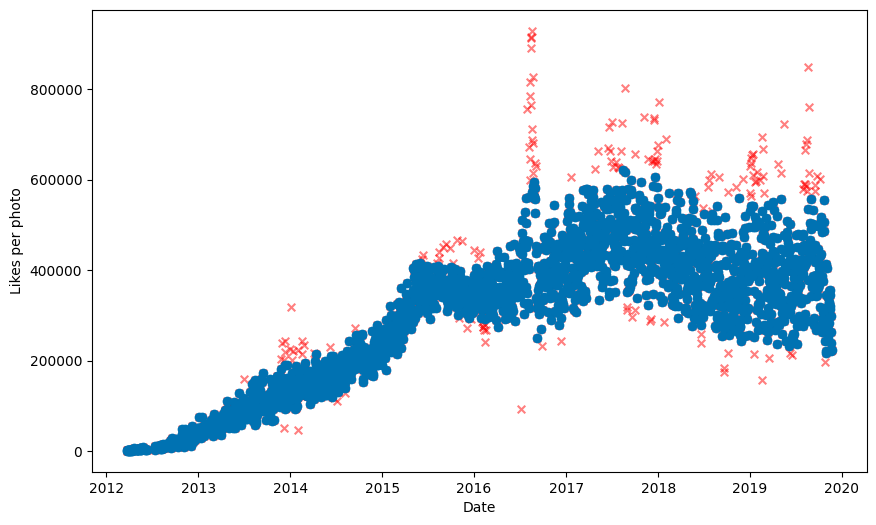

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df6['ds'], y=df6['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

In [50]:
df7 = df.copy().dropna().reset_index()

In [51]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6,
                seasonality_prior_scale=.01,
                changepoint_prior_scale=.01,
                interval_width=.90)
model.fit(df7)
forecast = model.predict()

16:10:26 - cmdstanpy - INFO - Chain [1] start processing
16:10:27 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
df8 = df7[(df7['y'] > forecast['yhat_lower']) &
          (df7['y'] < forecast['yhat_upper'])]

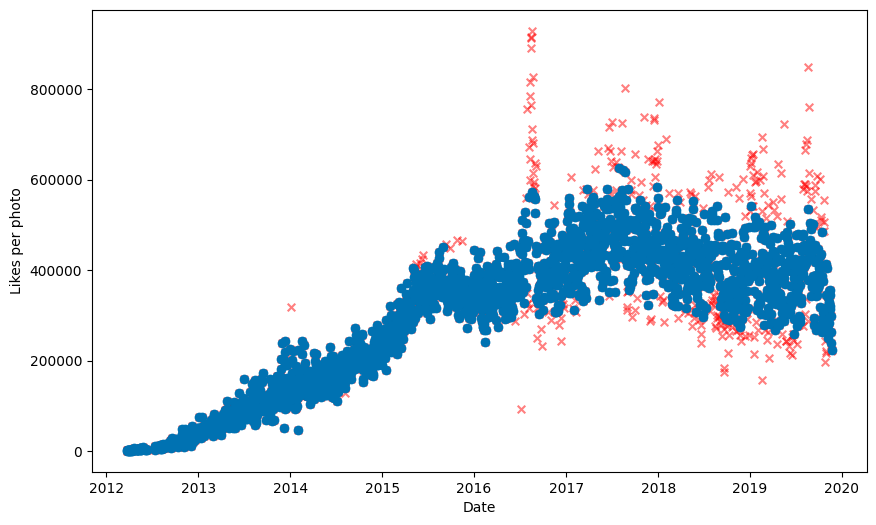

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df8['ds'], y=df8['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

In [54]:
promo = pd.DataFrame({'holiday': 'Promo event',
                      'ds': pd.to_datetime(['2016-07-29']),
                      'lower_window': 0,
                      'upper_window': 34})
future_promo = pd.DataFrame({'holiday': 'Promo event',
                             'ds': pd.to_datetime(['2020-06-01']),
                             'lower_window': 0,
                             'upper_window': 34})

promos = pd.concat([promo, future_promo])

16:25:38 - cmdstanpy - INFO - Chain [1] start processing
16:25:39 - cmdstanpy - INFO - Chain [1] done processing


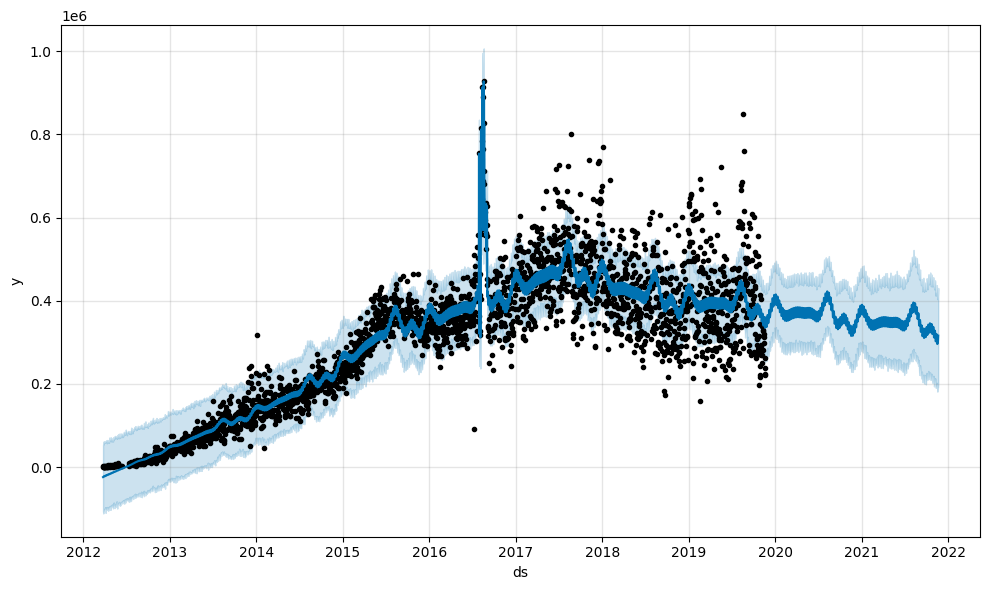

In [55]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=promo,
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365*2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

16:28:42 - cmdstanpy - INFO - Chain [1] start processing
16:28:42 - cmdstanpy - INFO - Chain [1] done processing


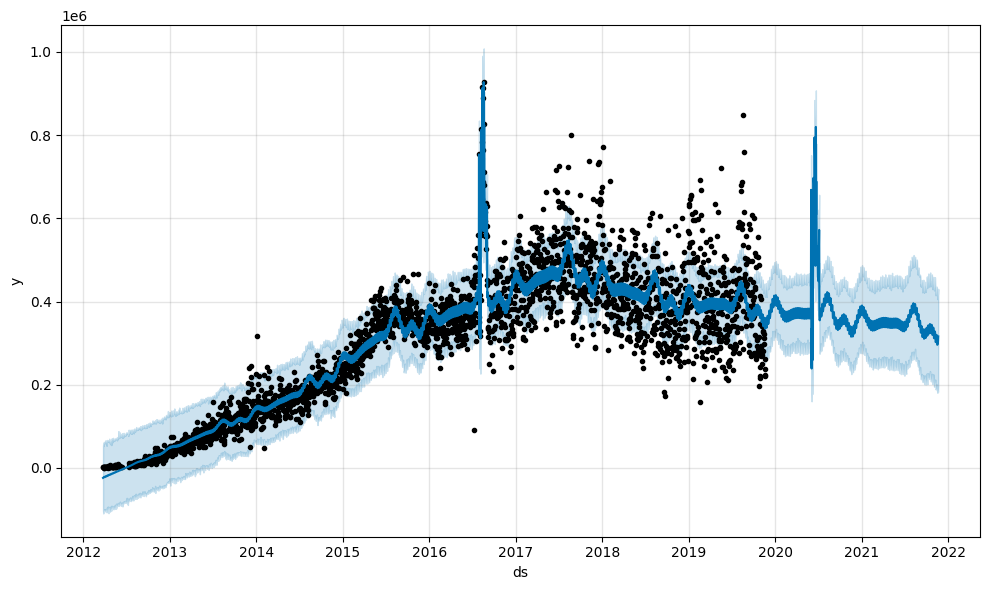

In [56]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=promos,
                yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365*2)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

In [57]:
df = pd.read_csv('../data/pedestrian_counts.csv')
df['Date'] = pd.to_datetime(df['Date'])

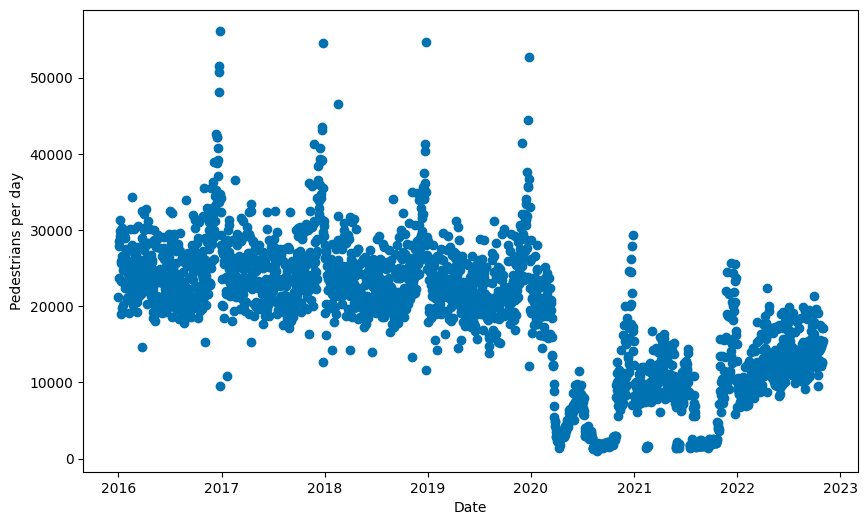

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Date'],
            y=df['Daily_Counts'],
            c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Pedestrians per day')
plt.show()

In [65]:
df = df[['Date', 'Daily_Counts']]
df.columns = ['ds', 'y']

KeyError: "None of [Index(['Date', 'Daily_Counts'], dtype='object')] are in the [columns]"

16:45:00 - cmdstanpy - INFO - Chain [1] start processing
16:45:00 - cmdstanpy - INFO - Chain [1] done processing


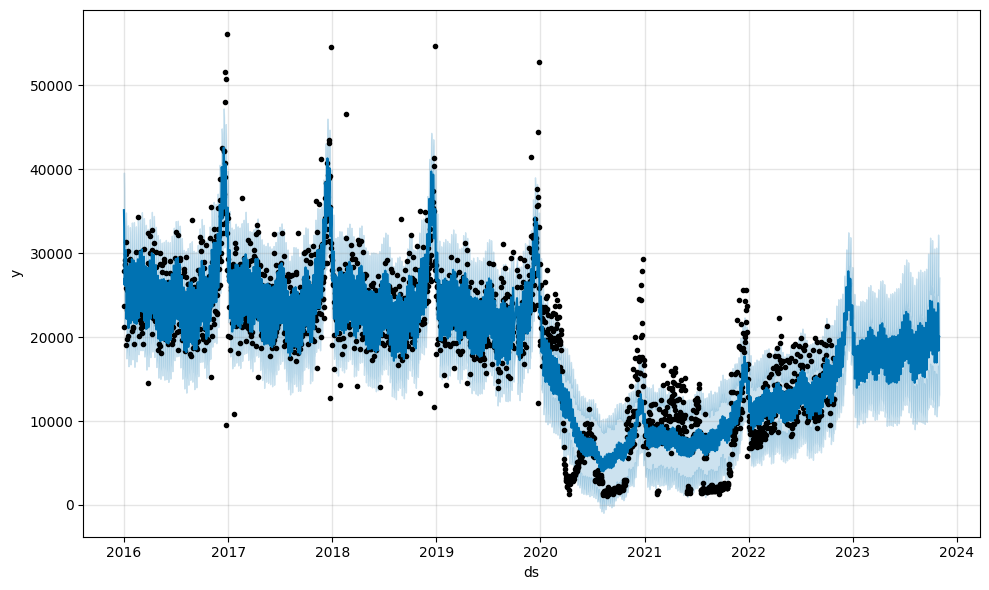

In [66]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

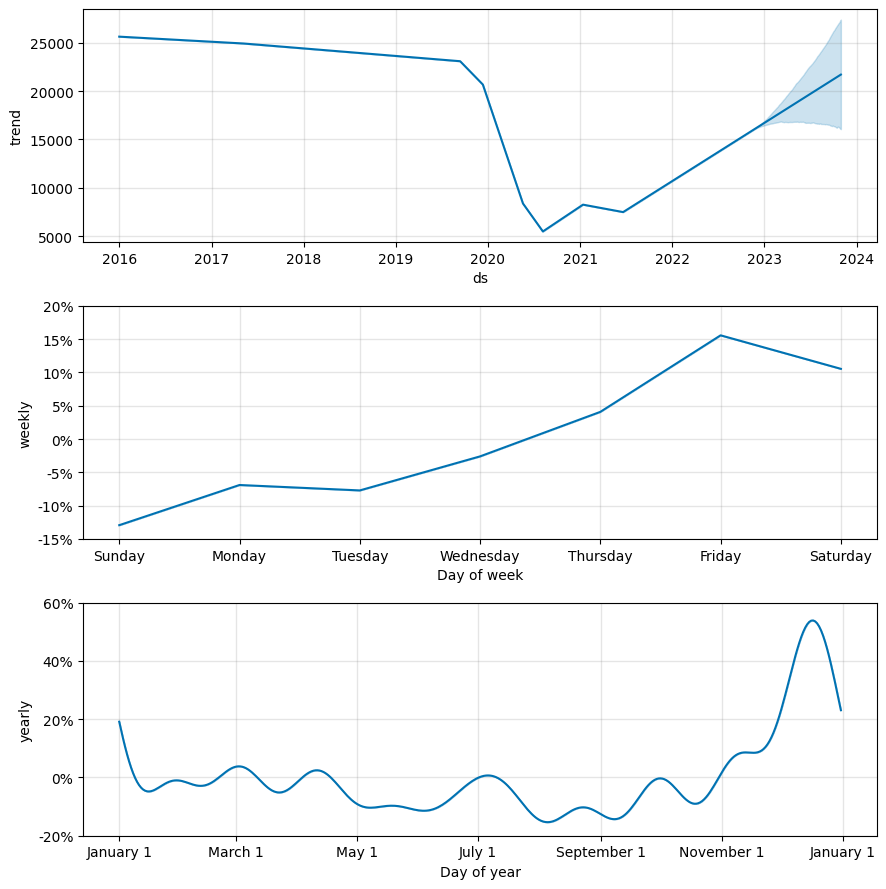

In [67]:
fig2 = model.plot_components(forecast)
plt.show()

In [68]:
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown1',
     'ds': pd.to_datetime('2020-03-21'),
     'lower_window': 0,
     'upper_window': 77},
     {'holiday': 'lockdown2',
     'ds': pd.to_datetime('2020-07-09'),
     'lower_window': 0,
     'upper_window': 110},
     {'holiday': 'lockdown3',
     'ds': pd.to_datetime('2021-02-13'),
     'lower_window': 0,
     'upper_window': 4},
     {'holiday': 'lockdown4',
     'ds': pd.to_datetime('2021-05-28'),
     'lower_window': 0,
     'upper_window': 13}
])

16:45:28 - cmdstanpy - INFO - Chain [1] start processing
16:45:29 - cmdstanpy - INFO - Chain [1] done processing


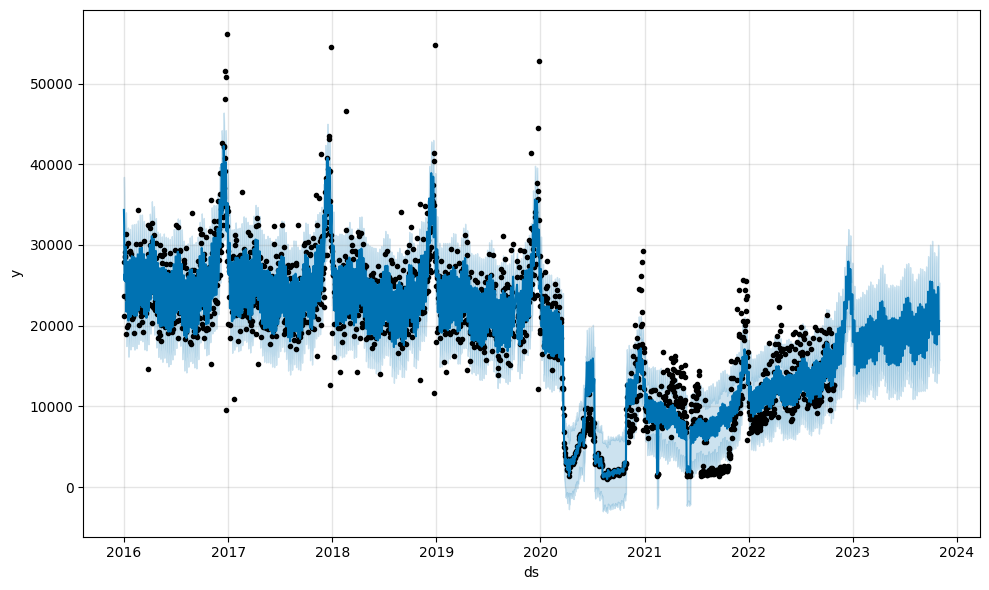

In [69]:
model = Prophet(seasonality_mode='multiplicative',
                holidays=lockdowns)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

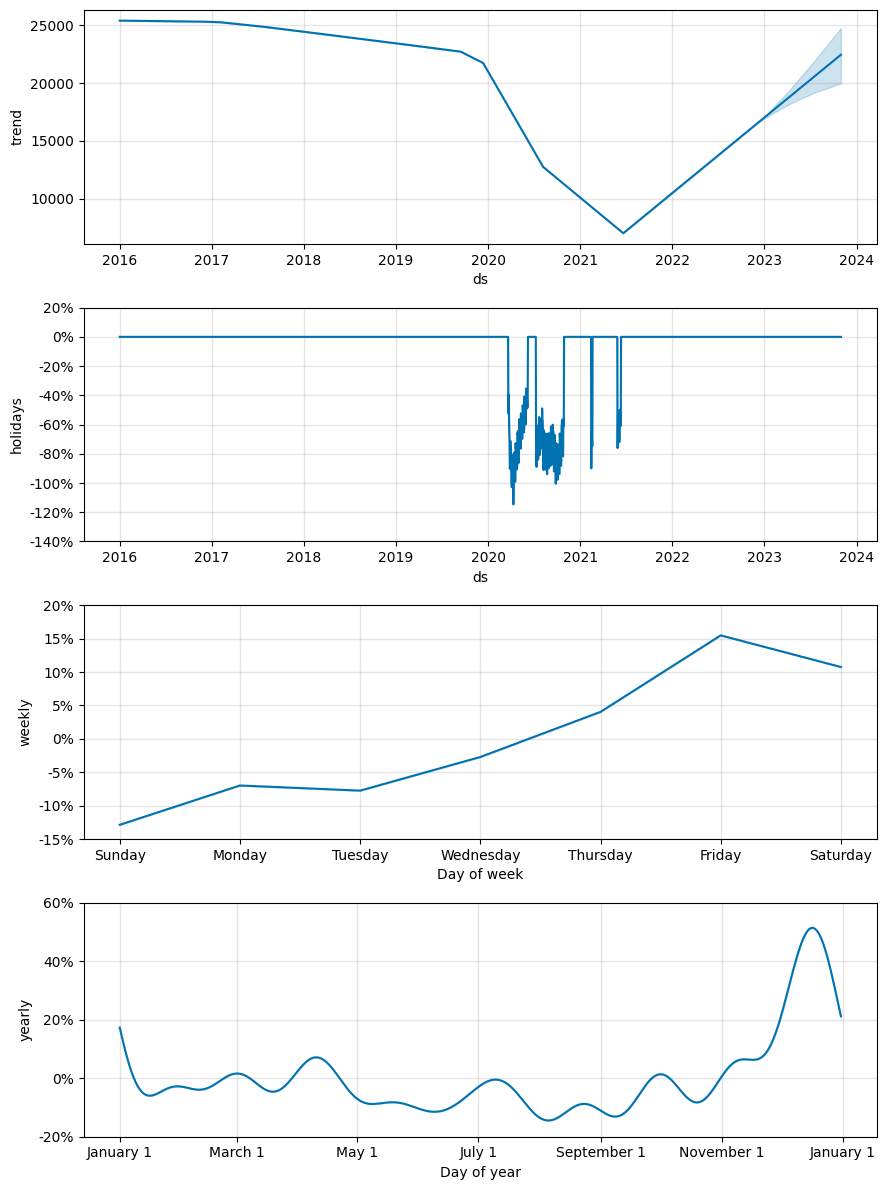

In [70]:
fig2 = model.plot_components(forecast)
plt.show()

In [71]:
df['pre_covid'] = df['ds'] < '2020-03-21'
df['post_covid'] = df['ds'] > '2021-06-10'

/var/folders/fn/cyp1s2wj7c39s35jrjsksnkw0000gn/T/ipykernel_46349/3426373499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_covid'] = df['ds'] < '2020-03-21'
/var/folders/fn/cyp1s2wj7c39s35jrjsksnkw0000gn/T/ipykernel_46349/3426373499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_covid'] = df['ds'] > '2021-06-10'


16:53:18 - cmdstanpy - INFO - Chain [1] start processing
16:53:18 - cmdstanpy - INFO - Chain [1] done processing


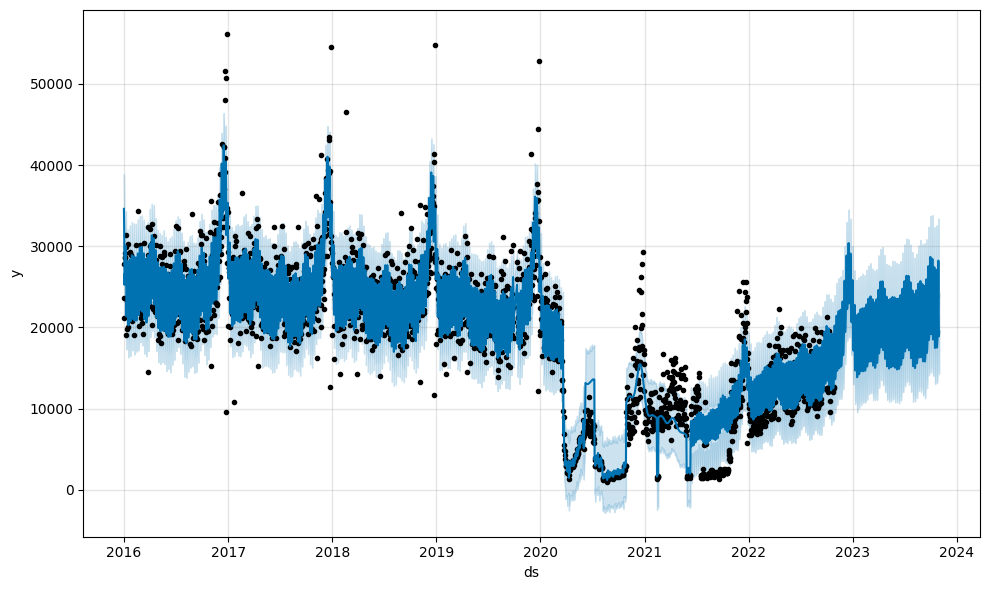

In [72]:
model = Prophet(seasonality_mode='multiplicative',
                weekly_seasonality=False,
                holidays=lockdowns)
model.add_seasonality(
    name='weekly_pre_covid',
    period=7,
    fourier_order=3,
    condition_name='pre_covid',
)
model.add_seasonality(
    name='weekly_post_covid',
    period=7,
    fourier_order=3,
    condition_name='post_covid',
)
model.fit(df)
future = model.make_future_dataframe(periods=365)
future['pre_covid'] = future['ds'] < '2020-03-21'
future['post_covid'] = future['ds'] > '2021-06-10'
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

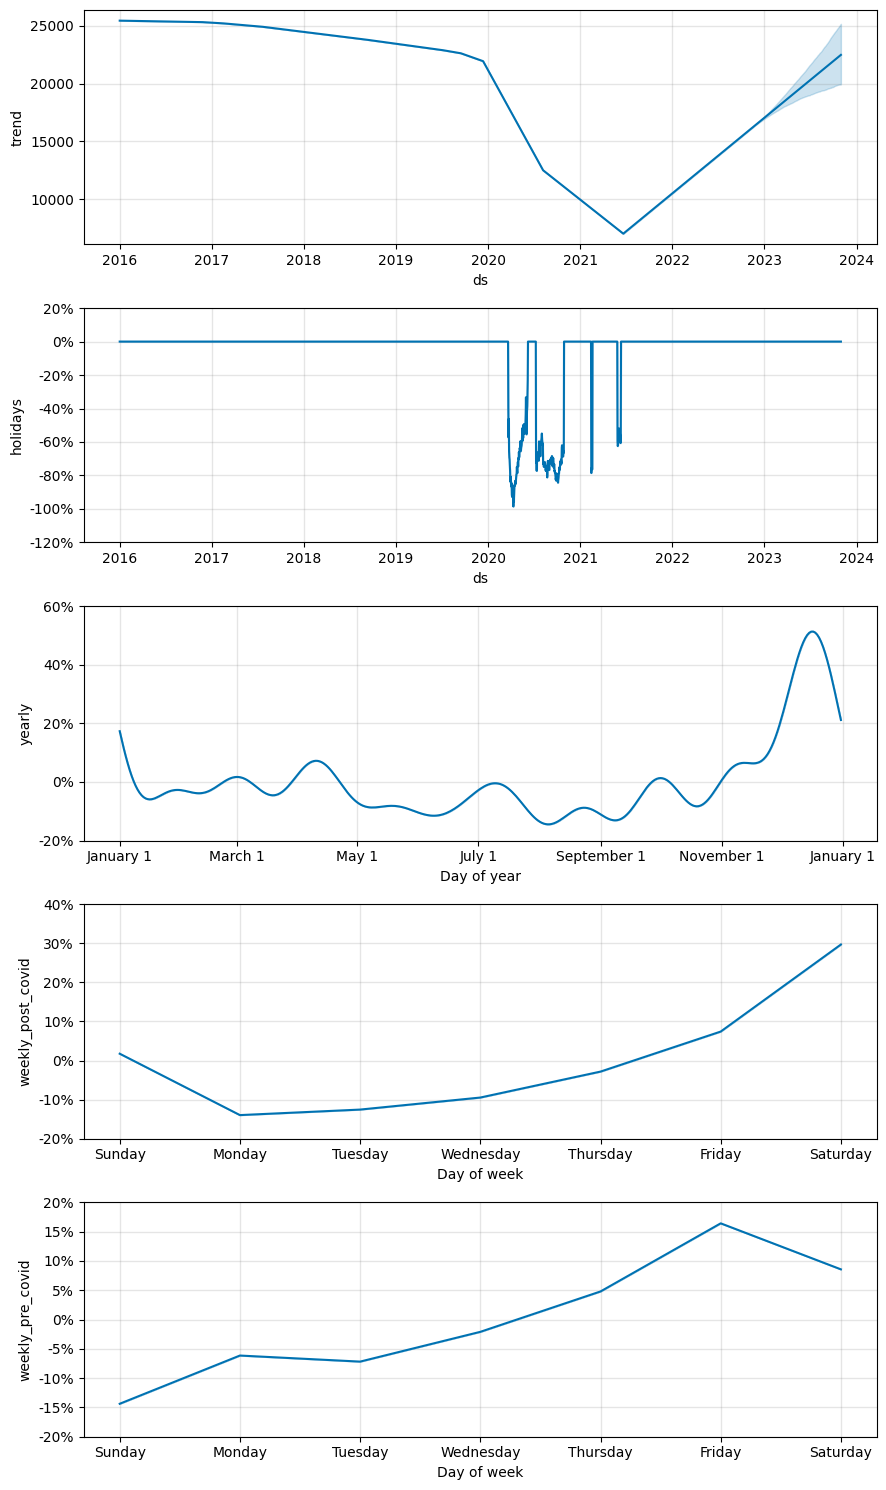

In [73]:
fig2 = model.plot_components(forecast)
plt.show()